# <font style="color:rgb(50, 120, 229);">  Regularización en Keras </font>



En este cuaderno, adoptaremos un enfoque experimental para aprender cómo usar conceptos para mejorar nuestro modelo.

Ilustraremos las diferentes técnicas usando el conjunto de datos Fashion MNIST.
<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/3_Conceptos_avanzados_entrenamiento/ejercicios/images/MNIST_fashion.png?raw=1" width="500">
</center>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Normalization, Resizing
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
def plot_metric(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.suptitle(title)

    plt.subplot(2, 1, 1)
    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(acc, label='accuracy')
    plt.plot(val_acc, label='val_accuracy')
    plt.legend()


In [3]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


## <font style="color:rgb(50, 120, 229);">  Experimento 1: Usar un modelo simple </font>

Comienza con una CNN pequeña (SmallModel [S]).

Ten en cuenta que si la precisión de entrenamiento no es muy alta, el modelo no es lo suficientemente complejo como para sobreajustar (obtener casi un 100% de precisión en los datos de entrenamiento o alrededor de cero pérdida en los datos de entrenamiento).

Siguiendo la definición de sesgo y varianza, este modelo tiene sesgo alto y varianza alta.

In [4]:
simple_model = Sequential([
   Input(shape=(28, 28, 1)),
   Normalization(),
   Conv2D(filters=4, kernel_size=5, activation='relu'),
   MaxPooling2D(2),
   Conv2D(filters=8, kernel_size=3, activation='relu'),
   MaxPooling2D(2),
   Flatten(),
   Dense(100, activation='relu'),
   Dense(50, activation='relu'),
   Dense(10, activation='softmax')
])

simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 28, 28, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 24, 24, 4)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 8)           │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,063 (101.81 KB)

 Trainable params: 26,060 (101.80 KB)

 Non-trainable params: 3 (16.00 B)

In [5]:
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
simple_history = simple_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - accuracy: 0.7009 - loss: 1.4110 - val_accuracy: 0.8086 - val_loss: 0.5222
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 32ms/step - accuracy: 0.8317 - loss: 0.4577 - val_accuracy: 0.8447 - val_loss: 0.4267
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.8506 - loss: 0.4009 - val_accuracy: 0.8502 - val_loss: 0.4095
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 26ms/step - accuracy: 0.8634 - loss: 0.3634 - val_accuracy: 0.8613 - val_loss: 0.3852
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 15ms/step - accuracy: 0.8756 - loss: 0.3294 - val_accuracy: 0.8671 - val_loss: 0.3631
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8812 - loss: 0.3200 - val_accuracy: 0.8666 - val_loss: 0.3815
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8873 - loss: 0.2974 - val_accuracy: 0.8663 - val_loss: 0.3712
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8933 -

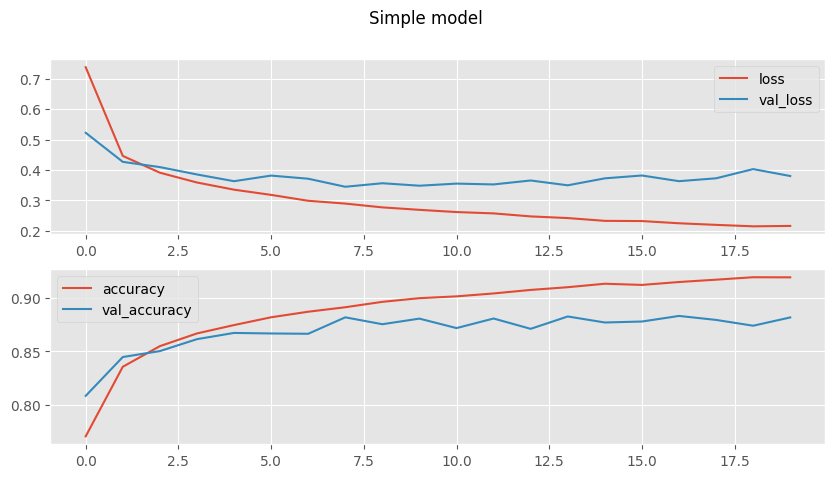

In [7]:
plot_metric(simple_history, 'Simple model')

## <font style="color:rgb(50, 120, 229);">  Experimento 2: Aumentar la complejidad del modelo </font>

Primero, entrenaremos un modelo sin regularización (sin Dropout, Batch Norm, Aumento de datos, Programador de velocidad de aprendizaje o penalización L2).

Descubrimos que ese modelo sobreajusta (100% de precisión en el entrenamiento, pero solo tiene 92-93% para la validación). Este modelo tiene sesgo bajo y varianza alta. Por lo tanto, necesitamos usar técnicas de regularización para reducir esta alta varianza.


In [8]:
mid_model = Sequential([
    Input(shape=(28, 28, 1)),
    Normalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mid_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 28, 28, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,781 (6.17 MB)

 Trainable params: 1,616,778 (6.17 MB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
mid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mid_history = mid_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 529s 281ms/step - accuracy: 0.7841 - loss: 1.0186 - val_accuracy: 0.8801 - val_loss: 0.3298
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 529s 282ms/step - accuracy: 0.8964 - loss: 0.2884 - val_accuracy: 0.8970 - val_loss: 0.2783
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 564s 284ms/step - accuracy: 0.9105 - loss: 0.2420 - val_accuracy: 0.9017 - val_loss: 0.2749
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 558s 281ms/step - accuracy: 0.9231 - loss: 0.2150 - val_accuracy: 0.9021 - val_loss: 0.2779
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 564s 282ms/step - accuracy: 0.9253 - loss: 0.2005 - val_accuracy: 0.9083 - val_loss: 0.2674
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 561s 282ms/step - accuracy: 0.9333 - loss: 0.1743 - val_accuracy: 0.9091 - val_loss: 0.2787
Epoch 7/20


In [ ]:
plot_metric(mid_history, 'Mid model')

## <font style="color:rgb(50, 120, 229);">  Experimento 3: Agregar Batch Normalization </font>

En este experimento, agregaremos capas `BatchNormalization` a la parte del extractor de características del modelo.

Notarás que la precisión de validación mejora, así como la pérdida disminuye. **Incluso si la precisión no mejora y solo la pérdida disminuye, aún significa que este es un modelo más robusto** (la confianza en la clasificación incorrecta no será muy alta).


In [ ]:
mid_model_batch_norm = Sequential([
    Input(shape=(28, 28, 1)),
    Normalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mid_model_batch_norm.summary()

In [ ]:
mid_model_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mid_history_batch_norm = mid_model_batch_norm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

In [ ]:
plot_metric(mid_history_batch_norm, 'Mid model with batch normalization')

## <font style="color:rgb(50, 120, 229);">  Experimento 4: Agregar Dropout </font>

En lugar de capas de normalización por lotes, utilizaremos Dropout2d para capas convolucionales y Dropout para capas lineales.

Con las capas de dropout, la precisión de validación permanece casi igual, pero la pérdida mejora.

In [ ]:
mid_model_dropout = Sequential([
    Input(shape=(28, 28, 1)),
    Normalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

mid_model_dropout.summary()

In [ ]:
mid_model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mid_history_dropout = mid_model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

In [ ]:
plot_metric(mid_history_dropout, 'Mid model with dropout')

## <font style="color:rgb(50, 120, 229);">  Experimento 5: Batch Normalization y Dropout </font>

Ahora, considera Batch Norm con Dropout. En términos de precisión de validación y pérdida, estos casos son ligeramente mejores que los anteriores.

In [ ]:
mid_model_dropout_batch_norm = Sequential([
    Input(shape=(28, 28, 1)),
    Normalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.5),
    Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

mid_model_dropout_batch_norm.summary()

In [ ]:
mid_model_dropout_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mid_history_dropout_batch_norm = mid_model_dropout_batch_norm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

In [ ]:
plot_metric(mid_history_dropout_batch_norm, 'Mid model with dropout and batch normalization')